In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/drive/MyDrive/MangoFruitDDS/SenMangoFruitDDS_bgremoved',
    seed=123,
    shuffle=True,
    image_size=(255,255),
    batch_size=32,
    )

Found 838 files belonging to 5 classes.


In [ ]:
len(dataset)

27

In [ ]:
class_names=dataset.class_names

In [ ]:
class_names

['Alternaria', 'Anthracnose', 'Black Mould Rot', 'Healthy', 'Stem and Rot']

In [ ]:
import numpy as np
for batch_size,label_size in dataset.take(1):
  print("Image shape:",batch_size.shape)
  print("label",label_size.numpy)
  print("Image",batch_size[0])

Image shape: (32, 255, 255, 3)
label <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([4, 2, 0, 1, 3, 4, 1, 4, 2, 2, 1, 4, 3, 1, 0, 4, 2, 3, 3, 4, 3, 2,
       4, 0, 4, 1, 3, 2, 1, 0, 1, 2], dtype=int32)>>
Image tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(255, 255, 3), dtype=float32)


## **Image Visualization**

In [ ]:
for batch_size,label_size in dataset.take(1):
  print(batch_size,label_size)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

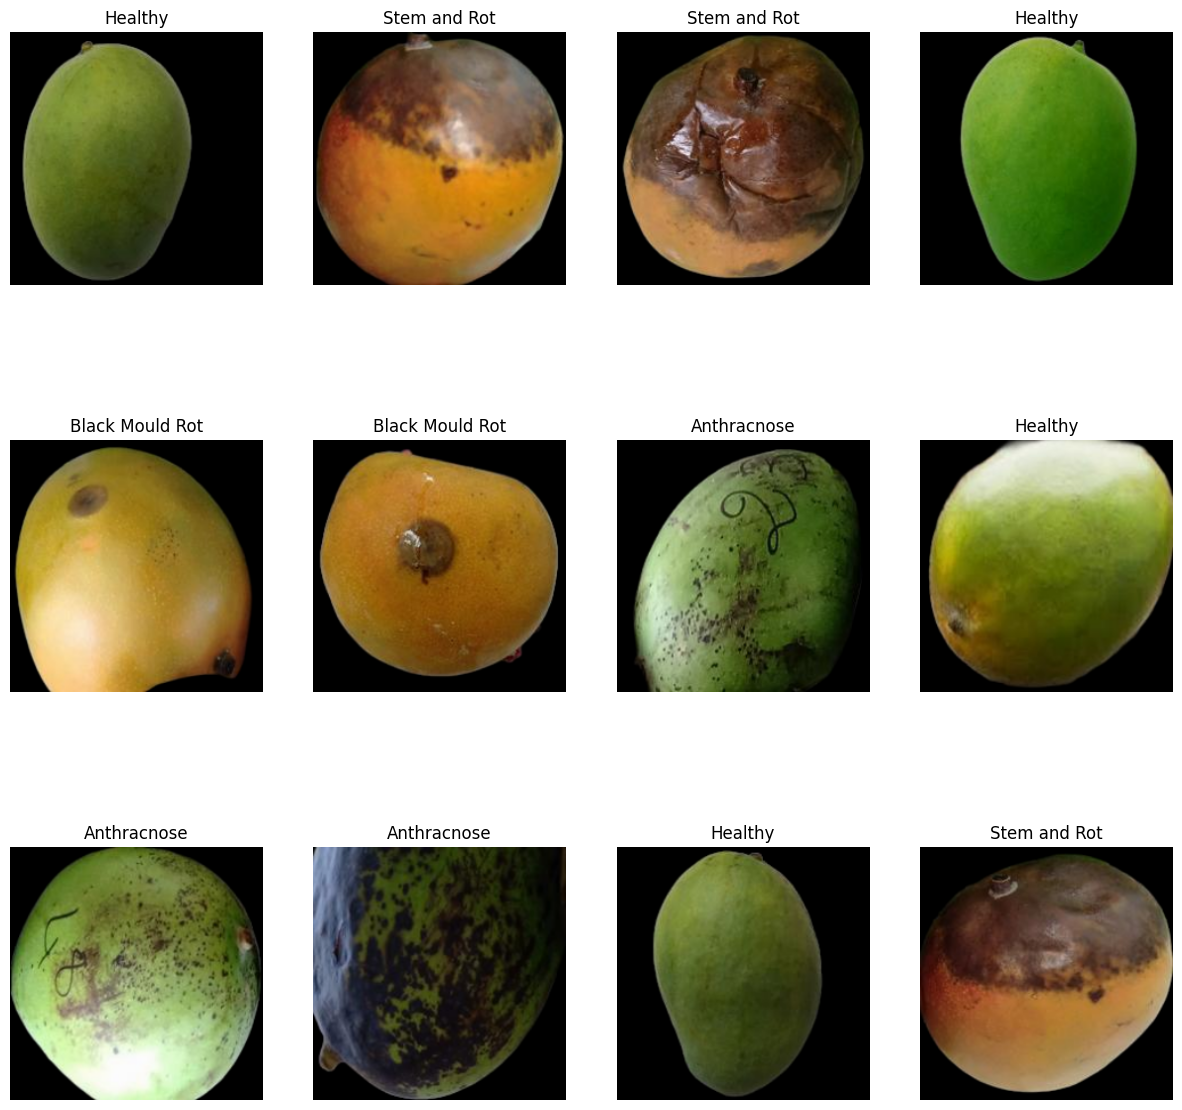

In [ ]:
plt.figure(figsize=(15,15))
for img,label in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(img[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')
#print(class_names[label[0]])
#print(label)

In [ ]:
len(dataset)

27

## **Train, Validation and test split**

In [ ]:
def dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  assert(train_split+val_split+test_split)==1
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)

  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)
  return train_ds,val_ds,test_ds

train_ds,val_ds,test_ds=dataset_partitions_tf(dataset)

In [ ]:
len(train_ds),len(val_ds),len(test_ds)

(21, 2, 4)

## **Data Transformations- Cache,Shuffle and Prefetch of dataset**

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# **Sizing and Scaling the Dataset**

In [ ]:
resize_And_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(255,255),
    layers.experimental.preprocessing.Rescaling(1./255)
])

## **Data Augumentation**

In [ ]:
'''data_augumentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])'''

"data_augumentation=tf.keras.Sequential([\n    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),\n    layers.experimental.preprocessing.RandomRotation(0.2)\n])"

### Apply Data Augumentation to the dataset

In [ ]:
'''train_ds=train_ds.map(lambda x,y:(data_augumentation(x,training=True),y)).prefetch(buffer_size=tf.data.AUTOTUNE)'''

'train_ds=train_ds.map(lambda x,y:(data_augumentation(x,training=True),y)).prefetch(buffer_size=tf.data.AUTOTUNE)'

In [ ]:
'''train_ds'''

'train_ds'

In [ ]:
len(train_ds)

21

## **Model Building**

In [ ]:
input_shape = (32, 255, 255, 3)
n_classes = 5

model = models.Sequential([
    resize_And_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 255, 255, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 253, 253, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 126, 126, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 124, 124, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

**Compiling the Model**

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
outhistory = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
21/21 [==============================] - 106s 5s/step - loss: 0.1593 - accuracy: 0.9427 - val_loss: 0.2364 - val_accuracy: 0.9375
Epoch 2/30
21/21 [==============================] - 103s 5s/step - loss: 0.1608 - accuracy: 0.9443 - val_loss: 0.2036 - val_accuracy: 0.8906
Epoch 3/30
21/21 [==============================] - 104s 5s/step - loss: 0.1651 - accuracy: 0.9412 - val_loss: 0.1941 - val_accuracy: 0.9219
Epoch 4/30
21/21 [==============================] - 101s 5s/step - loss: 0.1007 - accuracy: 0.9659 - val_loss: 0.1229 - val_accuracy: 0.9375
Epoch 5/30
21/21 [==============================] - 104s 5s/step - loss: 0.0422 - accuracy: 0.9892 - val_loss: 0.1077 - val_accuracy: 0.9688
Epoch 6/30
21/21 [==============================] - 103s 5s/step - loss: 0.0238 - accuracy: 0.9954 - val_loss: 0.1037 - val_accuracy: 0.9531
Epoch 7/30
21/21 [==============================] - 104s 5s/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.0570 - val_accuracy: 0.9688
Epoch 8/30
21

In [ ]:
output_score=model.evaluate(test_ds)

4/4 [==============================] - 4s 808ms/step - loss: 0.4048 - accuracy: 0.9412


In [ ]:
model.save('model.h5')

## **Prediction with Model on Sample Image**

In [ ]:
model=tf.keras.models.load_model('model.h5')

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

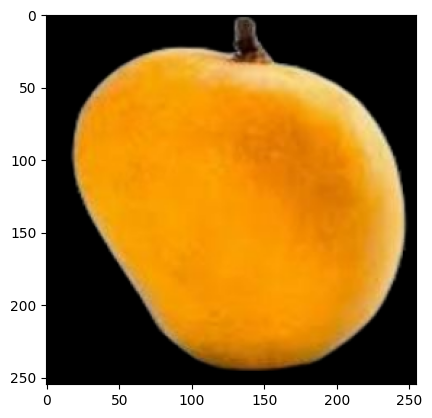

In [ ]:
for img,label in test_ds.take(1):
  first_img=img[0].numpy().astype('uint8')
  first_label=label[0].numpy()
  print(img)
  print(label)
  pred_img=model.predict(img)
  plt.imshow(first_img)
  print("Actual label:", class_names[first_label])
  print("Predicted label:", class_names[np.argmax(pred_img[0])])

In [ ]:
def predict(model,img):
  mangoimg_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  mangoimg_array=tf.expand_dims(mangoimg_array,0)

  predictions=model.predict(mangoimg_array)
  predicted_class=class_names[np.argmax(predictions[0])]
  out_confidence=round(100*np.max(predictions[0]),2)
  return predicted_class,out_confidence

1/1 [==============================] - 0s 53ms/step


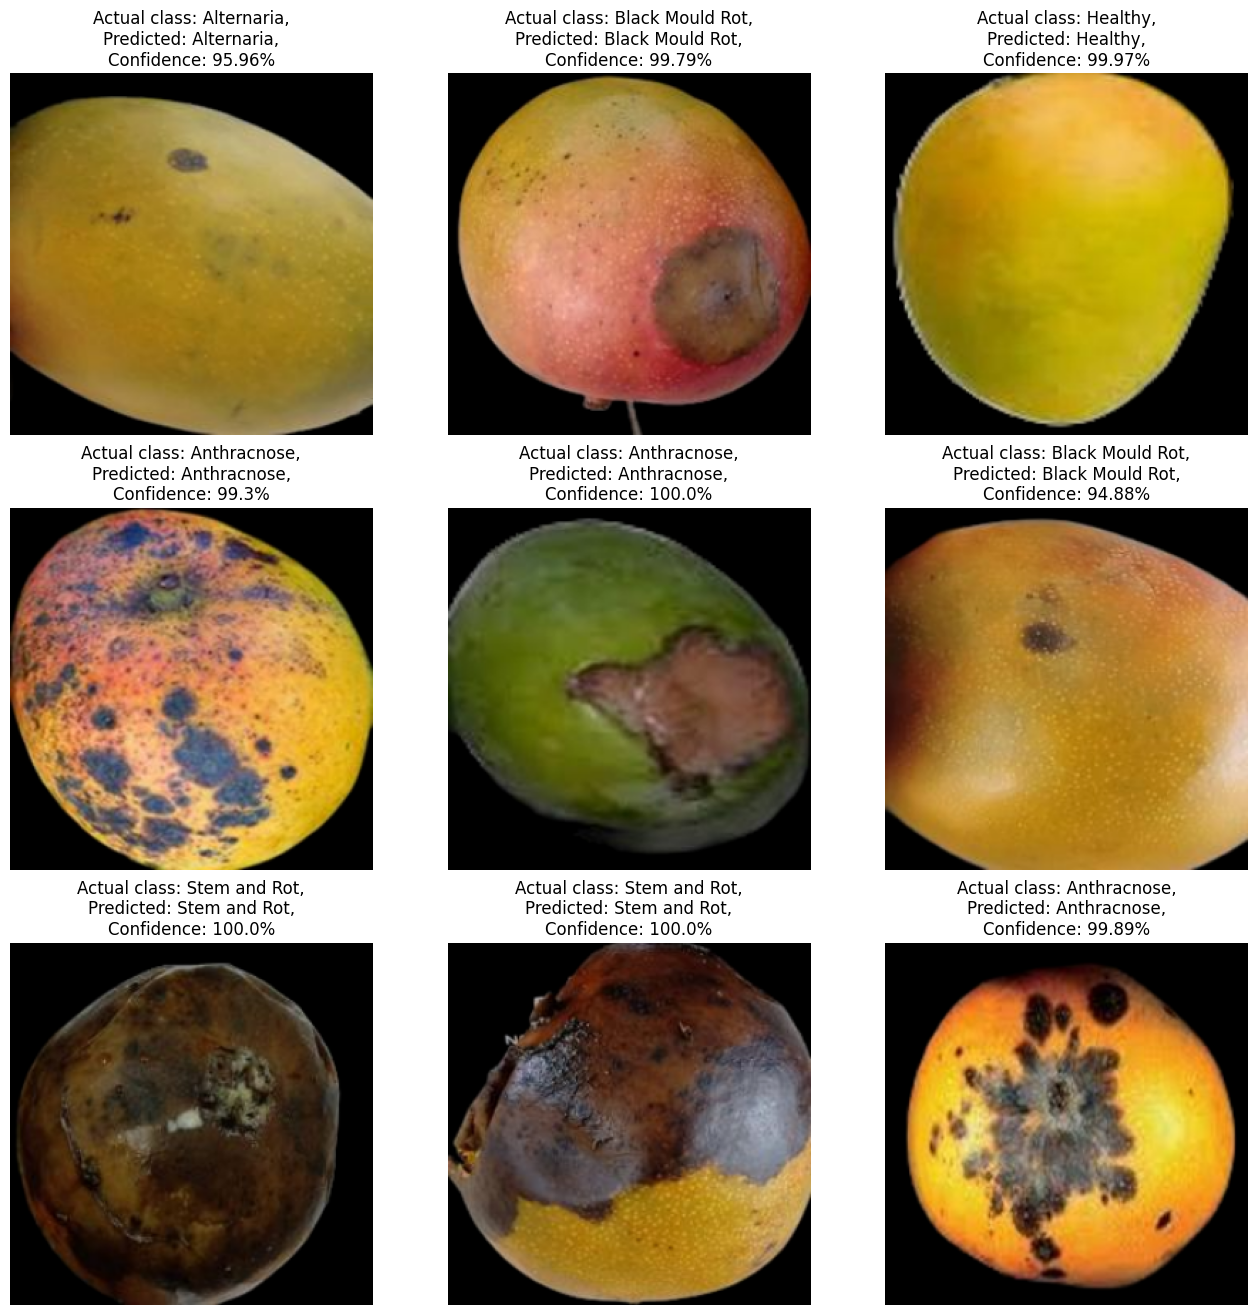

In [ ]:
plt.figure(figsize=(16,16))

for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class,out_confidence=predict(model,images[i].numpy())

    actual_class=class_names[labels[i]]

    plt.title(f"Actual class: {actual_class},\nPredicted: {predicted_class},\nConfidence: {out_confidence}%")
    plt.axis('off')